<a href="https://colab.research.google.com/github/MINJIN82/-Ubion/blob/main/mini_project25_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (9,447 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128285 files and di

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font',family='NanumbarunGothic')

In [ ]:
from matplotlib import pyplot as plt
from pandas import DataFrame
import numpy as np
import pandas as pd
import math
import sklearn.preprocessing 
from scipy import stats
import scipy as sp
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/mini/online_diet_1.xlsx")

/usr/local/lib/python3.9/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [ ]:
df.isnull().sum()
df_z =df.fillna(0)
df_z.isnull().sum()

seq_num            0
id                 0
social_id1         0
zip_code           0
occupation         0
sex                0
height             0
weight             0
married            0
dise               0
want_diet          0
goal               0
created            0
waist              0
heap               0
loss_part          0
loss_part_count    0
diet_purpose       0
diet               0
bmi                0
order_id           0
pfid               0
p_name             0
p_price            0
p_created          0
p_quantity         0
1P_price           0
Unnamed: 27        0
Unnamed: 28        0
dtype: int64

In [ ]:
df=df_z
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4511 entries, 0 to 4510
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   seq_num          4511 non-null   float64
 1   id               4511 non-null   object 
 2   social_id1       4511 non-null   float64
 3   zip_code         4511 non-null   object 
 4   occupation       4511 non-null   float64
 5   sex              4511 non-null   float64
 6   height           4511 non-null   float64
 7   weight           4511 non-null   float64
 8   married          4511 non-null   float64
 9   dise             4511 non-null   object 
 10  want_diet        4511 non-null   float64
 11  goal             4511 non-null   float64
 12  created          4511 non-null   object 
 13  waist            4511 non-null   object 
 14  heap             4511 non-null   object 
 15  loss_part        4511 non-null   object 
 16  loss_part_count  4511 non-null   float64
 17  diet_purpose  

In [ ]:
df['bmi_g']=df['bmi'].apply(lambda x: 
                                1 if x < 18.5 
                                else 2 if x < 23 
                                else 3 if x < 25 
                                else 4 if x < 30 
                                else 5)
df


,seq_num,id,social_id1,zip_code,occupation,sex,height,weight,married,dise,...,order_id,pfid,p_name,p_price,p_created,p_quantity,1P_price,Unnamed: 27,Unnamed: 28,bmi_g
0,28.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,16560.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 1:10:38,1.0,27000.0,0.0,0,2
1,29.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,16926.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 1:26:33,1.0,27000.0,0.0,0,2
2,30.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,16941.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 2:19:23,1.0,27000.0,0.0,0,2
3,31.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,16944.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 2:27:24,1.0,27000.0,0.0,0,2
4,32.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,16967.0,MDGBEAT004,아로마 장미향,20000.0,2001-05-17 오후 4:25:11,1.0,20000.0,0.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4506,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0,1
4507,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0,1
4508,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0,1
4509,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0,1


In [ ]:
e   = df.sort_values(["weight"],ascending=False)
e

,seq_num,id,social_id1,zip_code,occupation,sex,height,weight,married,dise,...,order_id,pfid,p_name,p_price,p_created,p_quantity,1P_price,Unnamed: 27,Unnamed: 28,bmi_g
2059,2662.0,nowpap,750314.0,305-343,12.0,2.0,159.0,505.5,0.0,4,...,22907.0,MDGLIKE006,매직마스크(★10만고객돌파기념☆),12900.0,2001-07-24 오전 10:05:01,1.0,12900.0,0.0,0,2
652,4092.0,ytm1004,731002.0,403-014,3.0,1.0,180.0,180.0,0.0,"1, 2",...,28980.0,MDEPART009,GDS-미니스텝퍼,39900.0,2001-08-22 오전 1:01:45,1.0,39900.0,0.0,0,5
4054,1571.0,yeppi0242,781104.0,602-062,3.0,2.0,155.0,167.0,0.0,"1, 2",...,24191.0,MDEETCC030,파워세라믹 종아리다이어트(1년 감사세일),19500.0,2001-08-03 오전 10:49:39,1.0,19500.0,0.0,0,5
713,3696.0,nysms,710102.0,480-090,14.0,2.0,159.0,164.0,1.0,0,...,23206.0,MDGFASH004,다이어트 반바지,20000.0,2001-08-18 오전 10:42:58,1.0,20000.0,0.0,0,5
677,4118.0,kimmh9632,660914.0,340-806,1.0,2.0,163.0,162.0,1.0,1,...,29091.0,MDGLIKE006,매직마스크(★10만고객돌파기념☆),14900.0,2001-08-22 오후 2:02:01,1.0,14900.0,0.0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4477,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0,1
4478,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0,1
4479,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0,1
4480,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0,0,0.0,0,0.0,0.0,0.0,0,1


In [ ]:
g = e[e["weight"]>= 150].index
g

Int64Index([2059, 652, 4054, 713, 677, 1811, 978], dtype='int64')

In [ ]:
df.drop(g,inplace=True)

In [ ]:
g = e[e["weight"]== 0].index
g

Int64Index([4497, 4487, 4486, 4488, 4485, 4489, 4490, 4491, 4492, 4493, 4494,
            4495, 4496, 4506, 4498, 4499, 4500, 4501, 4502, 4503, 4504, 4505,
            4507, 4509, 4508, 4483, 4484,  878, 4482, 4481, 1175, 2625, 4458,
            4459, 4460, 4461, 4462, 4463, 4464, 4465, 4466, 4467, 4468, 4469,
            4470, 4471, 4472, 4473, 4474, 4475, 4476, 4477, 4478, 4479, 4480,
            4510],
           dtype='int64')

In [ ]:
df.drop(g,inplace=True)

In [ ]:
df['social_id1'] = df['social_id1'].astype(str) # 시리즈의 데이터 타입을 문자열로 변환
df['birth_year'] = df['social_id1'].str[:2]

In [ ]:
df['birth_year'] = '19' + df['social_id1'].str.extract('(\d{2})') # 2자리 숫자 추출
this_year = 2023
df['age_group'] = (this_year - df['birth_year'].fillna(0).astype(int)) // 10 * 10 # 결측치를 0으로 대체한 후 정수형으로 변환 후 계산

In [ ]:
df.head()

,seq_num,id,social_id1,zip_code,occupation,sex,height,weight,married,dise,...,p_name,p_price,p_created,p_quantity,1P_price,Unnamed: 27,Unnamed: 28,bmi_g,birth_year,age_group
0,28.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 1:10:38,1.0,27000.0,0.0,0,2,1974,40
1,29.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 1:26:33,1.0,27000.0,0.0,0,2,1974,40
2,30.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 2:19:23,1.0,27000.0,0.0,0,2,1974,40
3,31.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 2:27:24,1.0,27000.0,0.0,0,2,1974,40
4,32.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,아로마 장미향,20000.0,2001-05-17 오후 4:25:11,1.0,20000.0,0.0,0,2,1974,40


In [ ]:
df = df.drop('Unnamed: 27', axis=1)

In [ ]:
df = df.drop('Unnamed: 28', axis=1)

In [ ]:
df

,seq_num,id,social_id1,zip_code,occupation,sex,height,weight,married,dise,...,order_id,pfid,p_name,p_price,p_created,p_quantity,1P_price,bmi_g,birth_year,age_group
0,28.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,16560.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 1:10:38,1.0,27000.0,2,1974,40
1,29.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,16926.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 1:26:33,1.0,27000.0,2,1974,40
2,30.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,16941.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 2:19:23,1.0,27000.0,2,1974,40
3,31.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,16944.0,MDGLIKE001,"오레그 O다리,X다리 교정벨트(고급형)",27000.0,2001-05-17 오후 2:27:24,1.0,27000.0,2,1974,40
4,32.0,webinner,740101.0,137-070,6.0,1.0,170.0,62.0,0.0,0,...,16967.0,MDGBEAT004,아로마 장미향,20000.0,2001-05-17 오후 4:25:11,1.0,20000.0,2,1974,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4453,2011.0,0162655575,830219.0,135-080,15.0,2.0,165.0,49.0,0.0,0,...,21654.0,MDEHRWE008,파워세라믹종아리 다이어트,29900.0,2001-07-05 오후 7:17:10,1.0,29900.0,1,1983,40
4454,2012.0,12girl,781007.0,136-043,17.0,2.0,160.0,63.0,0.0,2,...,21656.0,PDFMEAL014,풀무원 드림다이어트,300000.0,2001-07-05 오후 8:02:18,1.0,300000.0,3,1978,40
4455,2013.0,onlyonelhm,880330.0,327-030,15.0,2.0,159.0,58.0,0.0,0,...,21664.0,MDEHRWE008,파워세라믹종아리 다이어트,29900.0,2001-07-06 오전 1:17:45,1.0,29900.0,2,1988,30
4456,2014.0,morebest1,760709.0,0000000,12.0,1.0,177.0,109.0,0.0,0,...,21665.0,MDFMEAL007,대상다이어트프로그램,70000.0,2001-07-06 오전 1:50:12,1.0,70000.0,5,1976,40


<ipython-input-42-1928b63f12c3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["p_price"])


<Axes: xlabel='p_price', ylabel='Density'>

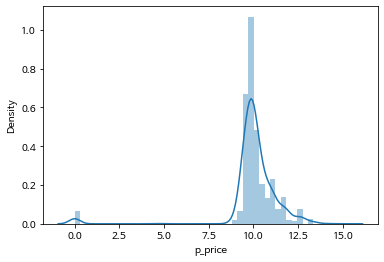

In [ ]:
import matplotlib
import seaborn as sns
import pandas as pd
from scipy import stats

df["p_price"] = np.log1p(df["p_price"])
sns.distplot(df["p_price"])

In [ ]:
from sklearn import preprocessing
df["p_price"]=preprocessing.scale(df["p_price"])
df["p_price"].describe()


count    4.511000e+03
mean    -7.804787e-16
std      1.000111e+00
min     -6.060613e+00
25%     -2.501896e-01
50%     -4.977080e-02
75%      3.271566e-01
max      3.109831e+00
Name: p_price, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()
print(minMaxScaler.fit(df[["p_price"]]))
train_data_minMaxScaled = minMaxScaler.transform(df[["p_price"]])
df["p_price_minmax"]=train_data_minMaxScaled
df["p_price_minmax"].describe()

MinMaxScaler()


count    4511.000000
mean        0.660885
std         0.109058
min         0.000000
25%         0.633603
50%         0.655458
75%         0.696561
max         1.000000
Name: p_price_minmax, dtype: float64

In [ ]:
df.columns

Index(['seq_num', 'id', 'social_id1', 'zip_code', 'occupation', 'sex',
       'height', 'weight', 'married', 'dise', 'want_diet', 'goal', 'created',
       'waist', 'heap', 'loss_part', 'loss_part_count', 'diet_purpose', 'diet',
       'bmi', 'order_id', 'pfid', 'p_name', 'p_price', 'p_created',
       'p_quantity', '1P_price', 'Unnamed: 27', 'Unnamed: 28', 'bmi_g',
       'p_price_minmax'],
      dtype='object')

In [ ]:
df1 = df[["goal", "loss_part_count", "bmi", "diet", "p_price","bmi_g" ]]
print(df1.corr(method='spearman'))

                     goal  loss_part_count       bmi   p_price     bmi_g
goal             1.000000         0.243066  0.478708  0.080024  0.449289
loss_part_count  0.243066         1.000000  0.240473  0.052141  0.222983
bmi              0.478708         0.240473  1.000000  0.128192  0.908331
p_price          0.080024         0.052141  0.128192  1.000000  0.127825
bmi_g            0.449289         0.222983  0.908331  0.127825  1.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import boxcox

In [ ]:
df.columns

Index(['seq_num', 'id', 'social_id1', 'zip_code', 'occupation', 'sex',
       'height', 'weight', 'married', 'dise', 'want_diet', 'goal', 'created',
       'waist', 'heap', 'loss_part', 'loss_part_count', 'diet_purpose', 'diet',
       'bmi', 'order_id', 'pfid', 'p_name', 'p_price', 'p_created',
       'p_quantity', '1P_price', 'Unnamed: 27', 'Unnamed: 28', 'bmi_g',
       'p_price_minmax', 'birth_year', 'age_group'],
      dtype='object')

In [ ]:
num = ['goal', 'bmi','loss_part_count','occupation','age_group'] #스케일러 적용
cg = ['sex','married'] #카테고리컬(범주형) 

X = df[num+cg]
Y = df['p_price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#표준화, 원핫인코딩
ct = ColumnTransformer([('scling',StandardScaler(),num),('onehot',OneHotEncoder(sparse = False),cg)])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

print(X_train[0])

from sklearn.linear_model import LinearRegression #LinearRegression 선형모델
from sklearn.metrics import mean_squared_error 
from math import sqrt #sqrt 루트

lr = LinearRegression().fit(X_train, Y_train) 

Y_pred = lr.predict(X_test)
print("predict value\n",Y_pred)
print("train R2 : {:.3f}".format(lr.score(X_train, Y_train))) #트레인 데이터로 나온 R스퀘어
print("test R2 : {:.3f}".format(lr.score(X_test, Y_test))) 

rmse = sqrt(mean_squared_error(Y_test, Y_pred)) 
print("RMSE : {:.3f}". format(rmse))

[-0.2566367   0.29498824  0.19206994  0.58407697 -0.12367248  0.
  0.          1.          1.          0.        ]
predict value
 [-0.14989284  0.14863373  0.05448258 ...  0.04895156  0.16938606
  0.1438956 ]
train R2 : 0.452
test R2 : 0.404
RMSE : 0.763


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
#릿지(L2) 모형이 라쏘(L1) 모형보다 예측을 더 잘한다.(오차가 적다)
#다수의 변수, 변수의 계수(베타)를 0에 가깝게 만들어야하는 데이터 셋의 경우 라쏘가 더 낫다. 
#알파가 작아지느냐 알파가 커지느냐에 따라 규제 강도가 달라진다.
#알파가 작으면 선형회귀 모형에 가까워지고, 커질 수록 릿지와 라쏘의 모형에 가까워진다.

from sklearn.linear_model import Ridge

lr_ridge = Ridge(random_state = 0). fit(X_train, Y_train)
Y_pred = lr_ridge.predict(X_test)

print("예측값(Y predict value)\n", Y_pred)

rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("ridge R2 : {:.3f}". format(lr_ridge.score(X_train, Y_train)))
print("RMSE : {:.3f}".format(rmse))

#비교
print("lr R2 : {:.3f}". format(lr_ridge.score(X_train, Y_train)))

예측값(Y predict value)
 [-0.14960473  0.14519531  0.05539396 ...  0.04930567  0.16810363
  0.14242347]
ridge R2 : 0.452
RMSE : 0.763
lr R2 : 0.452


In [ ]:
#라쏘
from sklearn.linear_model import Lasso

lr_lasso = Lasso(random_state = 0, alpha = 0.01, max_iter =1000). fit(X_train, Y_train) #alpha = 0.01, max_iter =1000) 등 연구자가 정해주는 값이 하이퍼 파라미터이다.
#알파 값에 의해서 규제를 준다.
Y_pred = lr_lasso.predict(X_test)

print("예측값(Y predict value)\n", Y_pred)

rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("lasso R2 : {:.3f}". format(lr_lasso.score(X_train, Y_train)))
print("RMSE : {:.3f}".format(rmse))

#비교
print("lr R2 : {:.3f}". format(lr.score(X_train, Y_train)))
print("ridge R2 : {:.3f}". format(lr_ridge.score(X_train, Y_train)))

예측값(Y predict value)
 [-0.01130832  0.10469644  0.05986885 ...  0.05986885  0.1342036
  0.08132079]
lasso R2 : 0.446
RMSE : 0.766
lr R2 : 0.452
ridge R2 : 0.452


In [ ]:
#knn최근접이웃

from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors =9, p=2)
#p : int, default =2
#Power parameter for the Minkowski metric. When p=1,
#This is equivalent to using manhattan_distance(l1),and euclidean_distance(l2) for p = 2. For arbitrary p, minkowski_distance

knn_reg.fit(X_train,Y_train)
Y_pred = knn_reg.predict(X_test)
print("accuracy :{:.3f}".format(knn_reg.score(X_train, Y_train))) #모형의 Train으로 구한 정확도임(R2과 같음음)
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE: {:.3f}".format(rmse))

accuracy :0.519
RMSE: 0.783


In [ ]:
#의사결정나무

from sklearn.tree import DecisionTreeRegressor

DT_model_reg = DecisionTreeRegressor(random_state=0,max_depth =5)
DT_model_reg.fit(X_train, Y_train)
Y_pred = DT_model_reg.predict(X_test)
print("accuracy : {:.3f}".format(DT_model_reg.score(X_train, Y_train)))
rmse = sqrt(mean_squared_error(Y_test,Y_pred))
print("rmse :{:.3f} ",format(rmse))

accuracy : 0.488
rmse :{:.3f}  0.7682792509833689


In [ ]:
feature_name = X.columns
feature_importance = DT_model_reg.feature_importances_
sorted(zip(feature_importance, feature_name),reverse=True)

[(0.9362659861402938, 'loss_part_count'),
 (0.03173624912978234, 'bmi'),
 (0.012791171111523992, 'age_group'),
 (0.009895465736867812, 'goal'),
 (0.006422775855090698, 'married'),
 (0.002888352026441303, 'occupation'),
 (0.0, 'sex')]

In [ ]:
#인공신경망

#4. 모델링
from sklearn.neural_network import MLPRegressor

#4-1. 모델 생성
nn_reg_model = MLPRegressor(random_state = 0,alpha=0.001, max_iter = 2000, hidden_layer_sizes=[50,50])

#5. 모형학습 및 예측
nn_reg_model.fit(X_train, Y_train)
Y_pred = nn_reg_model.predict(X_test)

#6. 결과값 보고
print("Y predict value :\n", Y_pred)
print("train accuracy : {:.3f}".format(nn_reg_model.score(X_train, Y_train)))
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("accuracy : {:.3f}".format(nn_reg_model.score(X_train, Y_train)))
print("RMSE : {:.3f}". format(rmse))

Y predict value :
 [-0.23354721  0.36851474  0.01451888 ... -0.03564123  0.27043301
  0.22614973]
train accuracy : 0.495
accuracy : 0.495
RMSE : 0.764


In [ ]:
num = ['goal', 'bmi','loss_part_count','occupation','age_group'] #스케일러 적용
cg = ['sex','married'] #카테고리컬(범주형) 

X = df[df.age_group == 40][num+cg]
Y = df[df.age_group == 40]['p_price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#표준화, 원핫인코딩
ct = ColumnTransformer([('scling',StandardScaler(),num),('onehot',OneHotEncoder(sparse = False),cg)])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

print(X_train[0])

from sklearn.linear_model import LinearRegression #LinearRegression 선형모델
from sklearn.metrics import mean_squared_error 
from math import sqrt #sqrt 루트

lr = LinearRegression().fit(X_train, Y_train) 

Y_pred = lr.predict(X_test)
print("predict value\n",Y_pred)
print("train R2 : {:.3f}".format(lr.score(X_train, Y_train))) #트레인 데이터로 나온 R스퀘어
print("test R2 : {:.3f}".format(lr.score(X_test, Y_test))) 

rmse = sqrt(mean_squared_error(Y_test, Y_pred)) 
print("RMSE : {:.3f}". format(rmse))


[ 0.26261379 -0.01333111 -0.76873537  0.72534682  0.          1.
  0.          1.          0.        ]
predict value
 [ 0.04974344  0.08710757  0.05127762  0.08667078  0.02825432  0.05474707
  0.0439028   0.02744796  0.05098297  0.08755472  0.090101    0.19302898
  0.05411943  0.05349355  0.05036657  0.194782    0.03055917  0.05168643
  0.08897475 -0.11004479  0.0513683   0.0902675   0.05328782  0.06603018
  0.04944967  0.03264519  0.05345432  0.08801499  0.10420244  0.14358875
  0.02211044  0.05253379  0.08830964  0.08855195  0.05424758 -0.0061823
  0.05341597  0.02642461  0.05140577  0.05378731  0.11089526  0.04976691
  0.05393894  0.04659211  0.18931721 -0.11244033  0.03151893  0.05210923
  0.10206409  0.19249114 -0.10426687  0.06753885  0.05267935  0.05470872
  0.19092809  0.05281268  0.18312958  0.05047037 -0.0061823   0.05347779
  0.05269852  0.04526189  0.0290963   0.03813885  0.0518678   0.04007326
  0.09122814  0.03053119  0.02844518  0.05524568  0.08600479  0.1458038
  0.0529

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
